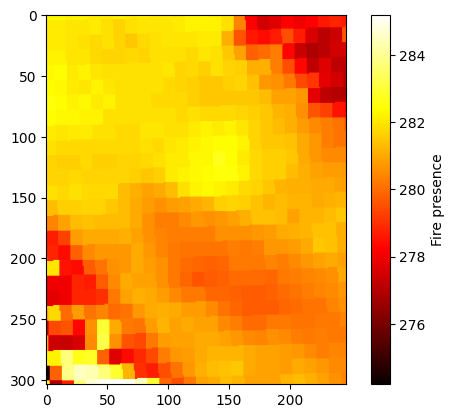

In [75]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
# dataset of .tifs in same folder
with rasterio.open("../WildfireSpreadTS/2018/fire_21458798/2018-01-13.tif") as src:
    img = src.read(9)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

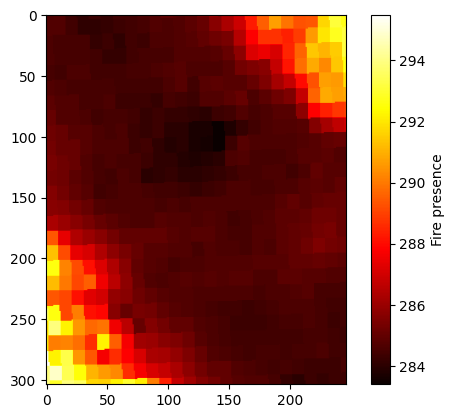

In [76]:
# dataset of .tifs in same folder
with rasterio.open("../WildfireSpreadTS/2018/fire_21458798/2018-01-13.tif") as src:
    img = src.read(10)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

In [77]:
with rasterio.open("../WildfireSpreadTS/2018/fire_21458798/2018-01-13.tif") as src:
    for b in range(1, src.count+1):
        print(b, src.descriptions[b-1])

1 M11
2 I2
3 I1
4 NDVI_last
5 EVI2_last
6 total precipitation
7 wind speed
8 wind direction
9 minimum temperature
10 maximum temperature
11 energy release component
12 specific humidity
13 slope
14 aspect
15 elevation
16 pdsi
17 LC_Type1
18 total_precipitation_surface_sum
19 forecast wind speed
20 forecast wind direction
21 forecast temperature
22 forecast specific humidity
23 active fire


In [78]:
with rasterio.open("WildfireSpreadTS_2019_fire_23410601_2019-10-16.tiff") as src:
    for b in range(1, src.count+1):
        print(b, src.descriptions[b-1])

1 M11
2 I2
3 I1
4 NDVI_last
5 EVI2_last
6 total precipitation
7 wind speed
8 wind direction
9 minimum temperature
10 maximum temperature
11 energy release component
12 specific humidity
13 slope
14 aspect
15 elevation
16 pdsi
17 LC_Type1
18 total_precipitation_surface_sum
19 forecast wind speed
20 forecast wind direction
21 forecast temperature
22 forecast specific humidity
23 active fire


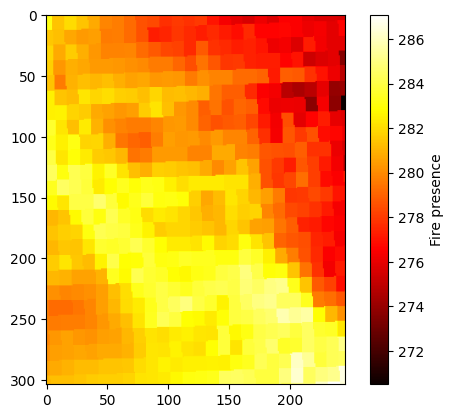

In [79]:
with rasterio.open("WildfireSpreadTS_2019_fire_23410601_2019-10-16.tiff") as src:
    img = src.read(9)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

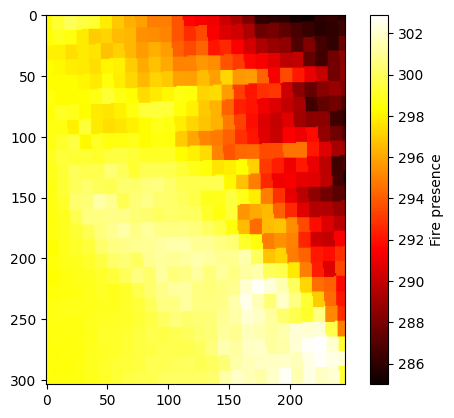

In [80]:
with rasterio.open("WildfireSpreadTS_2019_fire_23410601_2019-10-16.tiff") as src:
    img = src.read(10)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

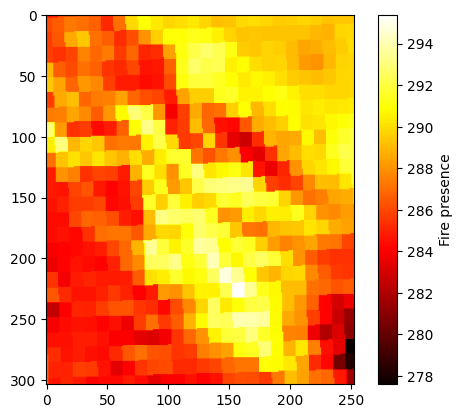

In [81]:
with rasterio.open("WildfireSpreadTS_2025_fire_23756984_2025-09-15.tiff") as src:
    img = src.read(4)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

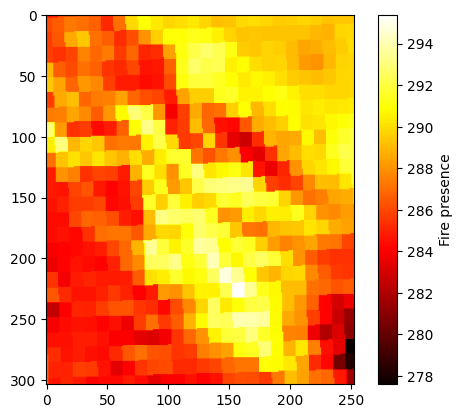

In [82]:
with rasterio.open("WildfireSpreadTS_2025_fire_23756984_2025-09-15.tiff") as src:
    arr = src.read(5)
#print(np.min(arr), np.max(arr))
#src.count
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

In [83]:
with rasterio.open("WildfireSpreadTS_2025_fire_23756984_2025-09-15.tiff") as src:
    for b in range(1, src.count+1):
        print(b, src.descriptions[b-1])
        print(aligned_data.shape)

1 total precipitation
(23, 304, 253)
2 wind speed
(23, 304, 253)
3 wind direction
(23, 304, 253)
4 minimum temperature
(23, 304, 253)
5 maximum temperature
(23, 304, 253)
6 energy release component
(23, 304, 253)
7 specific humidity
(23, 304, 253)
8 slope
(23, 304, 253)
9 aspect
(23, 304, 253)
10 elevation
(23, 304, 253)
11 pdsi
(23, 304, 253)
12 total_precipitation_surface_last
(23, 304, 253)
13 forecast wind speed
(23, 304, 253)
14 forecast wind direction
(23, 304, 253)
15 forecast temperature
(23, 304, 253)
16 forecast specific humidity
(23, 304, 253)
17 active fire
(23, 304, 253)


In [168]:




# Below is code used to fix data from 2025 so bands match with those of the other original dataset (2018-21)






# Fixing dataset bands for 2025

exp_bands = [
    "M11", "I2", "I1", "NDVI_last", "EVI2_last", "total precipitation", "wind speed", "wind direction", 
    "minimum temperature", "maximum temperature", "energy release component", "specific humidity", "slope", 
    "aspect", "elevation", "pdsi", " LC_Type1", "total_precipitation_surface_sum", "forecast wind speed", 
    "forecast wind direction", "forecast temperature", "forecast specific humidity", "active fire"
]
# Changes from original 17 bands to complete 23
with rasterio.open("WildfireSpreadTS_2025_fire_23756984_2025-09-15.tiff") as src:
    meta = src.meta.copy()
    height, width = src.height, src.width
    dtype = src.meta['dtype']

    existing = {}
    for i in range(src.count):
        name = src.descriptions[i] if src.descriptions[i] else f"band_{i+1}"
        existing[name] = src.read(i+1)
    reordered_data = []
    for name in exp_bands:
        if name in existing:
            reordered_data.append(existing[name])
        else:
            reordered_data.append(np.zeros((height, width), dtype=dtype))

    meta.update(count=len(exp_bands))
    
    with rasterio.open("Fixed_Prediction_2025.tiff", "w", **meta) as dst:
        for i, band in enumerate(reordered_data, 1):
            dst.write(band, i)
            dst.set_band_description(i, exp_bands[i-1])

In [169]:
with rasterio.open("Fixed_Prediction_2025.tiff") as src:
    for b in range(1, src.count+1):
        print(b, src.descriptions[b-1])

1 M11
2 I2
3 I1
4 NDVI_last
5 EVI2_last
6 total precipitation
7 wind speed
8 wind direction
9 minimum temperature
10 maximum temperature
11 energy release component
12 specific humidity
13 slope
14 aspect
15 elevation
16 pdsi
17 LC_Type1
18 total_precipitation_surface_sum
19 forecast wind speed
20 forecast wind direction
21 forecast temperature
22 forecast specific humidity
23 active fire


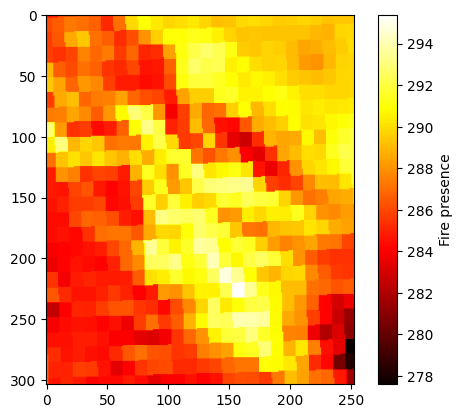

In [170]:
# Testing to make sure number moved up for the read (5)->(9)

with rasterio.open("Fixed_Prediction_2025.tiff") as src:
    img = src.read(9)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()

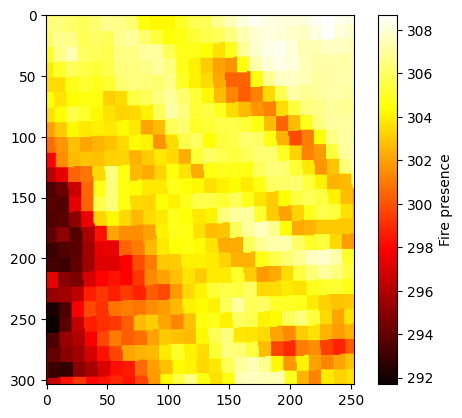

In [171]:
with rasterio.open("Fixed_Prediction_2025.tiff") as src:
    img = src.read(10)
plt.imshow(img, cmap="hot")
plt.colorbar(label="Fire presence")
plt.show()